In [411]:
import pandas as pd
from random import randint

data = pd.read_excel('dataset/togel-hongkong.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TANGGAL       1161 non-null   datetime64[ns]
 1   HARI          1161 non-null   object        
 2   PERIODE       1161 non-null   int64         
 3   NOMOR KELUAR  1161 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 36.4+ KB


In [414]:
data

,TANGGAL,HARI,PERIODE,NOMOR KELUAR
0,2024-09-23 23:03:25,senin,1161,8510
1,2024-09-22 23:03:25,Minggu,1160,5938
2,2024-09-21 23:03:25,Sabtu,1159,4194
3,2024-09-20 23:04:32,Jumat,1158,7388
4,2024-09-19 23:03:49,Kamis,1157,3247
...,...,...,...,...
1156,2021-07-25 20:24:04,Minggu,5,4359
1157,2021-07-24 20:23:26,Sabtu,4,8920
1158,2021-07-23 20:23:00,Jumat,3,2805
1159,2021-07-22 20:22:36,Kamis,2,6353


Text(0, 0.5, 'nomor')

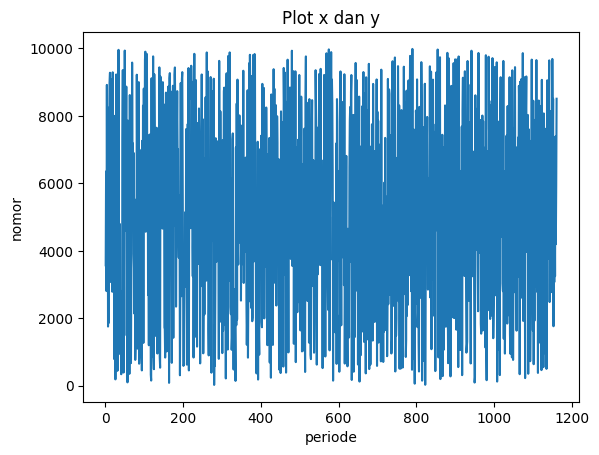

In [412]:
import matplotlib.pyplot as plt

x_plot = data.sort_values('PERIODE')['PERIODE']
y_plot = data.sort_values('PERIODE')['NOMOR KELUAR']

# Membuat plot
plt.plot(x_plot, y_plot)

# Memberi judul dan label sumbu
plt.title("Plot x dan y")
plt.xlabel("periode")
plt.ylabel("nomor")

# create_sliding windows

In [415]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data deret waktu
new_data = y_plot.head(1061)
print(new_data)

# Ukuran jendela
w_size = [10,11,20,30,40,50,60]
n_pred = 5
print(new_data.shape)

1160    3570
1159    6353
1158    2805
1157    8920
1156    4359
        ... 
104     3540
103     1630
102     4887
101     6704
100     3226
Name: NOMOR KELUAR, Length: 1061, dtype: int64
(1061,)


In [390]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale = np.array(new_data).reshape(-1,1)
sclae = scaler.fit_transform(scale)

new_data_scale = pd.DataFrame(sclae, columns=['Scaled'])

In [391]:
new_data_scale = new_data_scale.values.flatten()

In [393]:
new_data_scale

array([0.35604616, 0.63532363, 0.27927747, ..., 0.16136478, 0.48820873,
       0.67054691])

In [416]:
def create_sliding_window(data, window_size, n_predictions):
    X, y = [], []
    for i in range(len(data) - window_size - n_predictions + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + n_predictions])
    return np.array(X), np.array(y)

# Membuat sliding window
# X, y = create_sliding_window(new_data, window_size= w_size, n_predictions = n_pred)

# print("X shape:", X.shape)
# print("y shape:", y.shape)

In [227]:
# Membagi data menjadi training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# budi ways

In [228]:
# new_data = new_data.reshape(-1,1)
# new_data.shape

In [229]:
# SEQ_LEN = 21 # 6, 11, 21
# SPLIT = 0.90 # 0.80, 0.90
# WINDOW_SIZE = SEQ_LEN - 1

In [230]:
# def to_sequences(data, seq_len):
#     d = []
#     for index in range(len(data) - seq_len):
#         d.append(data[index: index + seq_len])
#     return np.array(d)

# def preprocess(data_raw, seq_len, train_split):
#     data = to_sequences(data_raw, seq_len)
#     num_train = int(train_split * data.shape[0])
#     X_train = data[:num_train, :-1, :]
#     y_train = data[:num_train, -1, :]
#     X_test = data[num_train:, :-1, :]
#     y_test = data[num_train:, -1, :]
#     return X_train, y_train, X_test, y_test

# X_train, y_train, X_test, y_test = preprocess(new_data, SEQ_LEN, train_split = SPLIT)

In [231]:
# print (X_train)
# print (y_train)
# print (X_test)
# print (y_test)

# tes beberapa model

In [395]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
import lightgbm as lgb



def matrices(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    print("Mean Absolute Error for prediction :", mae)
    print("Mean Squared Error for prediction :", mse)
    print("Root Mean Squared Error for prediction :", rmse)
    return mae, mse, rmse

def train (X_train, X_test, y_train, y_test,models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Results for {model_name}:")
        matrices(y_test, y_pred)
        print()  # Baris kosong untuk pemisah

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "xgboost": XGBRegressor(),
    "XgboostRF": XGBRFRegressor()
}

In [396]:
for i in w_size:
    X, y = create_sliding_window(new_data_scale, window_size= i, n_predictions = n_pred)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('with w_size = ',i)
    train(X_train, X_test, y_train, y_test,models)


with w_size =  10
Results for Linear Regression:
Mean Absolute Error for prediction : 0.25360039058936323
Mean Squared Error for prediction : 0.08529149726063878
Root Mean Squared Error for prediction : 0.2920470805548975

Results for Random Forest:
Mean Absolute Error for prediction : 0.25670321649583067
Mean Squared Error for prediction : 0.08766452043088568
Root Mean Squared Error for prediction : 0.29608194884336614

Results for xgboost:
Mean Absolute Error for prediction : 0.27818965321549083
Mean Squared Error for prediction : 0.11035260439247432
Root Mean Squared Error for prediction : 0.33219362485224535

Results for XgboostRF:
Mean Absolute Error for prediction : 0.25635972784907957
Mean Squared Error for prediction : 0.08787475791217063
Root Mean Squared Error for prediction : 0.2964367688262889

with w_size =  11
Results for Linear Regression:
Mean Absolute Error for prediction : 0.25396079487930895
Mean Squared Error for prediction : 0.08580873821054748
Root Mean Squared Er

# train with linear and rf with window 50 and 60 

In [418]:
import numpy as np

i = 50
# Get the last 100 numbers
tes = data.sort_values('PERIODE')['NOMOR KELUAR']
tes = tes.tail(100)
print(tes)
# tes = tes.head(99)
last_numbers = np.array(tes)

# Ensure last_numbers has the correct size for prediction
if last_numbers.shape[0] >= i:
    # Reshape to (1, i) to match the input shape for the model
    last_numbers = last_numbers[-i:].reshape(1, -1)  # Take the last i numbers
else:
    raise ValueError("Not enough numbers to make a prediction.")

print(last_numbers)

# Create sliding window data
X, y = create_sliding_window(new_data, window_size=i, n_predictions=n_pred)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)
matrices(y_test, y_pred)

# Predict the next number using last_numbers
predicted_number = model.predict(last_numbers)

print("Prediksi nomor lotre selanjutnya:", predicted_number.round())

99    7361
98    5752
97    8892
96    8138
95     340
      ... 
4     3247
3     7388
2     4194
1     5938
0     8510
Name: NOMOR KELUAR, Length: 100, dtype: int64
[[5838  378 6760 8456 3965 1280 6034 8296 7122 4533  461 9070 1393 4118
  5985  549 8074  963 5305 1490 7618 3843 6519  498 7267 9057 7116 3768
  5976 8461 9647 2480 6091 4525 8145 3401 4982 2774 9690 6421 8508 1762
  5213 3070 5714 3247 7388 4194 5938 8510]]
Mean Absolute Error for prediction : 2590.3334137836528
Mean Squared Error for prediction : 9185511.850297334
Root Mean Squared Error for prediction : 3030.760935853789
Prediksi nomor lotre selanjutnya: [[4125. 4005. 4404. 5464. 4086.]]


In [452]:
import numpy as np

i = 50
# Get the last 100 numbers
new_data = y_plot[:1061]
tes = data.sort_values('PERIODE')['NOMOR KELUAR']
tes = tes[1061:]
# tes = tes.head(99)
last_numbers = np.array(tes)

# Ensure last_numbers has the correct size for prediction
if last_numbers.shape[0] >= i:
    # Reshape to (1, i) to match the input shape for the model
    last_numbers = last_numbers[-i:].reshape(1, -1)  # Take the last i numbers
else:
    raise ValueError("Not enough numbers to make a prediction.")

print(last_numbers)

# Create sliding window data
X, y = create_sliding_window(new_data, window_size=i, n_predictions=n_pred)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)
matrices(y_test, y_pred)

# Predict the next number using last_numbers
predicted_number = model.predict(last_numbers)

print("Prediksi nomor lotre selanjutnya:", predicted_number.round())

[[5838  378 6760 8456 3965 1280 6034 8296 7122 4533  461 9070 1393 4118
  5985  549 8074  963 5305 1490 7618 3843 6519  498 7267 9057 7116 3768
  5976 8461 9647 2480 6091 4525 8145 3401 4982 2774 9690 6421 8508 1762
  5213 3070 5714 3247 7388 4194 5938 8510]]
Mean Absolute Error for prediction : 2536.6165841584175
Mean Squared Error for prediction : 8667644.585970592
Root Mean Squared Error for prediction : 2944.08637542627
Prediksi nomor lotre selanjutnya: [[4066. 4988. 4939. 5415. 4755.]]


# pemecah angka

In [420]:
import pandas as pd

# Contoh dataframe dengan satu kolom angka
data = pd.read_excel('dataset/togel-hongkong.xlsx')
data = data.sort_values('PERIODE')

pick_dat = data['NOMOR KELUAR']

In [421]:
print(pick_dat)

1160    3570
1159    6353
1158    2805
1157    8920
1156    4359
        ... 
4       3247
3       7388
2       4194
1       5938
0       8510
Name: NOMOR KELUAR, Length: 1161, dtype: int64


In [331]:
# iff u want to add new number 
# pick_dat.loc[len(pick_dat)] = 5938

In [422]:
import itertools
import random
# Fungsi untuk menghasilkan kombinasi dua digit
def generate_combinations(num):
    num_str = str(num)
    combinations = []
    
    # Mengambil setiap kombinasi dua digit
    combinations = [''.join(pair) for pair in itertools.permutations(num_str, 2)]
    unique_list = list(set(combinations))

    return unique_list[:7]
    # return six_num

# Terapkan fungsi pada kolom 'angka'
pick_dat['kombinasi'] = pick_dat.apply(generate_combinations)

# Mengubah daftar kombinasi menjadi kolom-kolom
kombinasi_df = pick_dat['kombinasi'].apply(pd.Series)

# Menampilkan hasil
print(kombinasi_df)


       0   1   2   3   4   5   6
1160  03  05  53  37  35  75  50
1159  36  53  35  63  65  33  56
1158  85  05  58  20  02  52  50
1157  98  90  09  20  08  80  29
1156  94  93  53  35  49  39  59
...   ..  ..  ..  ..  ..  ..  ..
4     23  32  37  47  72  24  34
3     78  37  38  88  83  87  73
2     94  44  41  49  19  14  91
1     93  98  85  53  58  35  39
0     85  05  15  58  51  50  08

[1161 rows x 7 columns]


C:\Users\alam\AppData\Local\Temp\ipykernel_49936\836496408.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pick_dat['kombinasi'] = pick_dat.apply(generate_combinations)


In [423]:
kombinasi_df.to_excel('dataset/togel7.xlsx',index=False)

# tes menggunakan data togel 7

In [424]:
nomor = pd.read_excel("dataset/togel7.xlsx")

nomor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1161 non-null   int64  
 1   1       1160 non-null   float64
 2   2       1155 non-null   float64
 3   3       1109 non-null   float64
 4   4       1088 non-null   float64
 5   5       1088 non-null   float64
 6   6       1001 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 63.6 KB


In [436]:
print(nomor.isna().sum())

nomor =  nomor.fillna(0)

print('after fill:\n',nomor.isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64
after fill:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


In [437]:
data_flat = nomor.apply(lambda row: np.array(row), axis=1)
data_flat = np.vstack(data_flat)  # Convert to a 2D array

In [448]:
def create_sliding_window7(data, window_size, n_predictions):
    X = []
    y = []
    for i in range(len(data) - window_size - n_predictions + 1):
        X.append(data[i:i + window_size].flatten())  # Flatten the window
        y.append(data[i + window_size:i + window_size + n_predictions].flatten())  # Target
    return np.array(X), np.array(y)

In [449]:
import numpy as np

i = 50
# new_data is 1060 data head 
new_data = data_flat[:1061]
print(new_data.shape)
# tes data is for making prediction... it is the last 100 data
tes = data_flat[1061:]
print(tes.shape)
tes = tes[-i:].flatten().reshape(1, -1)

X, y = create_sliding_window7(new_data, window_size=i, n_predictions=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)
matrices(y_test, y_pred)

# Predict the next number using last_numbers
predicted_number = model.predict(tes)
predicted_number = np.unique(predicted_number.round()) 
print("Prediksi nomor lotre selanjutnya:", predicted_number)

(1061, 7)
(100, 7)
Mean Absolute Error for prediction : 25.143386138613863
Mean Squared Error for prediction : 868.0923467609617
Root Mean Squared Error for prediction : 29.463406910283844
Prediksi nomor lotre selanjutnya: [34. 37. 38. 40. 42. 43. 44. 45. 46. 47. 49. 50. 51. 52. 53. 54. 55. 56.
 57. 58.]


# train predict biasa dengan RF

In [345]:
dat_train = nomor.head(1059)
dat_test = nomor.tail(100)

x = nomor.iloc[:,0:]
y = 

In [346]:
x

,0,1,2,3,4,5,6
0,3,5.0,53.0,37.0,35.0,75.0,50.0
1,36,53.0,35.0,63.0,65.0,33.0,56.0
2,85,5.0,58.0,20.0,2.0,52.0,50.0
3,98,90.0,9.0,20.0,8.0,80.0,29.0
4,94,93.0,53.0,35.0,49.0,39.0,59.0
...,...,...,...,...,...,...,...
1155,75,15.0,17.0,51.0,41.0,71.0,47.0
1156,23,32.0,37.0,47.0,72.0,24.0,34.0
1157,78,37.0,38.0,88.0,83.0,87.0,73.0
1158,94,44.0,41.0,49.0,19.0,14.0,91.0
